<a href="https://colab.research.google.com/github/EnneRebeca/An-lises-com-Python/blob/main/Atividade_2_Enne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A) Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados

**Dataset: Análise de sentimentos em Rede Social**
 https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset
---

**Contexto**: O dataset foi extraido do Kaggle afim de auxiliar na execução do trabalho. O documento fornece como feactures Likes, retweets, platform (instagram, facebook etc) dentre outros. Nesse contexto, foi utilizado os "likes" e "Retweets" e as classes como os sentimentos (positivos, negativos ou neutros).

Bibliotecas utilizadas

In [1]:
#Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando dataset

In [3]:
# Caminho do arquivo CSV
file_path = "sentimentdataset.csv"

# Leitura do arquivo
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

## Criação do Histograma

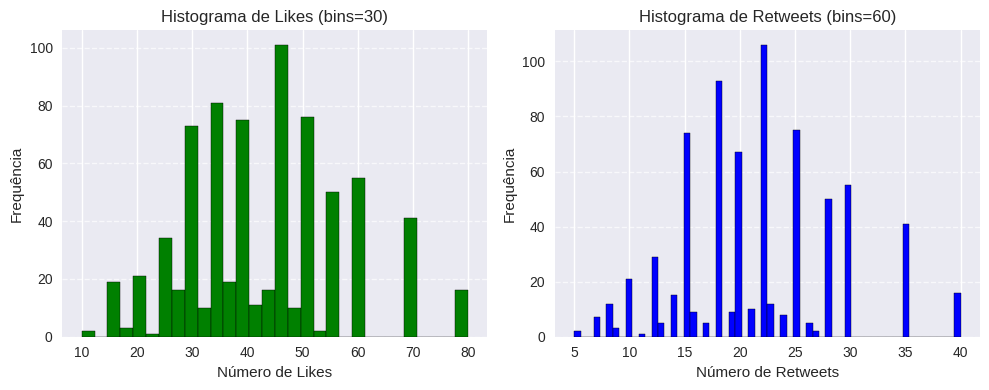

In [ ]:
# Limpando os dados: Remoção dos valores nulos da coluna 'Likes' e 'Retweets'
df_clean = df.dropna(subset=['Likes','Retweets'])

# Número de Bins
bins_30 = 30  # Menos bins (maior intervalo por bin)
bins_60 = 60  # Mais bins (menor intervalo por bin)

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma: 30 bins
axes[0].hist(df_clean['Likes'], bins=bins_30, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes (bins={bins_30})')
axes[0].set_xlabel('Número de Likes')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma: 60 bins
axes[1].hist(df_clean['Retweets'], bins=bins_60, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets (bins={bins_60})')
axes[1].set_xlabel('Número de Retweets')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste do layout
plt.tight_layout()
plt.show()

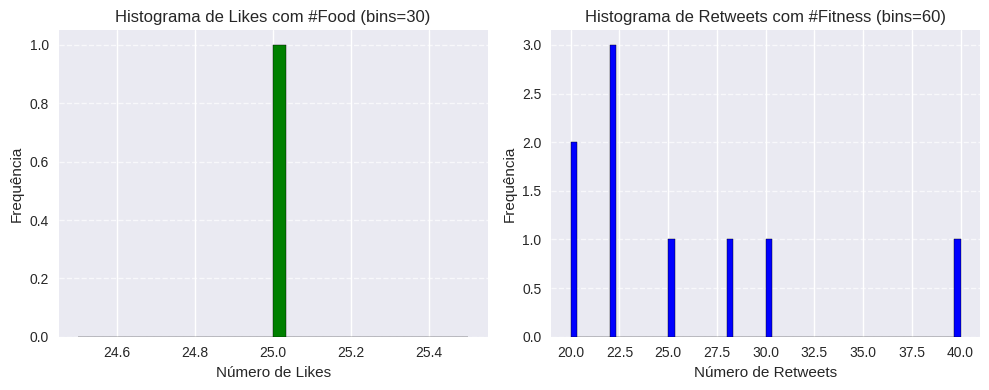

In [20]:
# Limpar os dados: remover valores nulos nas colunas 'Likes' e 'Retweets'
df_clean = df.dropna(subset=['Likes', 'Retweets'])

# Filtrar posts com a hashtag #Food
df_food = df_clean[df_clean['Hashtags'].str.contains('#Food', case=False, na=False)]

# Filtrar posts com a hashtag #Fitness
df_fitness = df_clean[df_clean['Hashtags'].str.contains('#Fitness', case=False, na=False)]

# Número de Bins
bins_likes = 30  # Menos bins (maior intervalo por bin)
bins_retweets = 60  # Mais bins (menor intervalo por bin)

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma: Frequência de Likes para posts com #Food
axes[0].hist(df_food['Likes'], bins=bins_likes, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes com #Food (bins={bins_likes})')
axes[0].set_xlabel('Número de Likes')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma: Frequência de Retweets para posts com #Fitness
axes[1].hist(df_fitness['Retweets'], bins=bins_retweets, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets com #Fitness (bins={bins_retweets})')
axes[1].set_xlabel('Número de Retweets')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste do layout
plt.tight_layout()
plt.show()

Discussão: Histograma de Likes com a hashtag #Food: (bins=30) simplifica a apresentação do histograma, contudo os dados ficam concentrados.
O histograma indica que a hashtag #Food recebeu aproximadamente 25 likes, número de curtidas, sugerindo que essa concentração tendem a ter uma frequência de curtidas consistente.

Histograma de Retweets com a  hashtag #Fitness: (bins=60) esse número de bins ajuda na melhor visualização dos detalhes dos dados, assim como, ajuda a distinguir padrões de engajamento. Esse histograma possui uma distribuição mais dispersa, de 20 a 40 retweets, ou seja, tem maior variabilidade.

B) Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.

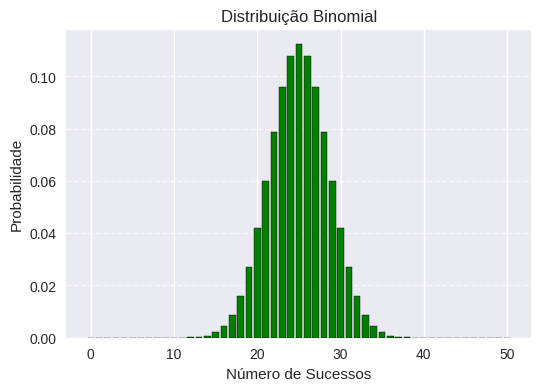

In [ ]:
# Limpeza dos dados: removendo valores nulos na coluna 'Likes'
df_clean = df.dropna(subset=['Likes'])

# Extraindo os dados da coluna 'Likes'
data = df_clean['Likes'].values

# Parâmetros da distribuição binomial
n = 50  # Nº de tentativas
p = 0.5  # Probabilidade de sucesso

# Valores da distribuição binomial
x = np.arange(0, n + 1)  # Valores possíveis de sucessos
pmf = binom.pmf(x, n, p)  # Probabilidade massa de cada valor

# Plotar a distribuição binomial
plt.figure(figsize=(6, 4))
plt.bar(x, pmf, color='green', alpha= 1.0, edgecolor='black')
plt.title('Distribuição Binomial')
plt.xlabel('Número de Sucessos')
plt.ylabel('Probabilidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C) Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.